In [278]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
from scipy.optimize import minimize, fmin
from astropy.wcs import WCS

In [4]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [24]:
star.premade = False
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400
time = sc.time[sq][start:end].value
tpfs = sc.flux[sq][start:end].value
errs = sc.flux_err[sq][start:end].value
bkgs = sc.flux_bkg[sq,0,0][start:end].value
bkg0 = np.mean(bkgs)
data = eleanor.TargetData(
    star, 
    height=13, 
    width=13, 
    do_pca=True, 
    do_psf=False,
    time_arr=time, 
    data_arr=tpfs, 
    err_arr=errs, 
    bkg_arr=bkgs, 
)
photometry_flux = sc.to_lightcurve().flux[sq][start:end]

In [409]:
data.psf_lightcurve(flux_arr=photometry_flux.value, model_name='Gaussian', bkg_mag_cutoff=10, verbose=True)

100%|██████████| 900/900 [02:30<00:00,  5.97it/s]


NameError: name 'res' is not defined

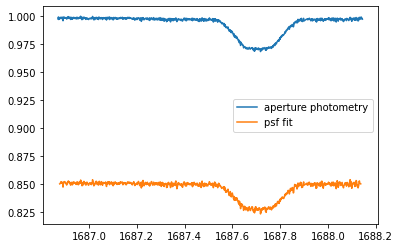

In [405]:
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
plt.plot(time[5:-5], (data.psf_flux[:end-start] / np.max(data.psf_flux[:end-start]))[5:-5] , label='psf fit')
plt.legend()
plt.show()

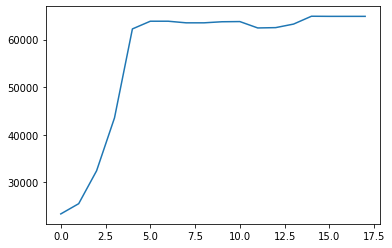

In [408]:
plt.plot(data.naive_psf_flux[2])

In [393]:
np.mean(data.naive_psf_flux, axis=1)

array([37794.44344415, 17324.13029534, 56493.04934151])

In [367]:
from scipy.interpolate import UnivariateSpline